# Import Libraries

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
mpl.rcParams['figure.dpi'] = 500

# Import data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Robinysh/Deep-Learning-Tutorial-2019-2020/master/CarPrice_Assignment.txt')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Plot Data

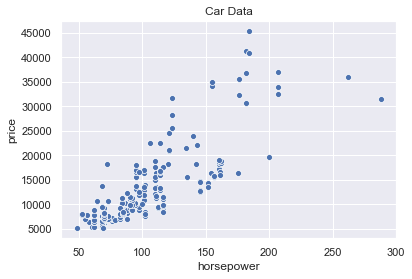

In [4]:
sns.set()
plt.title('Car Data')
sns.scatterplot(x='horsepower', y='price', data=data)

# Define equations for optimization

In [5]:
def linear(x, w, b):
    return w*x + b

def gradient_descent_linear(f, w, b, x, y, lr):
    h = f(x, w, b)
    w -= lr*((h - y)*x).mean()
    b -= lr*(h - y).mean()
    loss = ((h-y)**2).mean()
    return w, b, loss

# Define parameters

In [6]:
iterations = 500
w = 1
b = 0
lr = 1e-5

# Perform optimization

In [7]:
loss_log = []
data_x = data['horsepower']
data_y = data['price']
for _ in range(iterations):
    w, b, loss = gradient_descent_linear(linear, w, b, data_x, data_y, lr)
    loss_log.append(loss)

# Plot Results

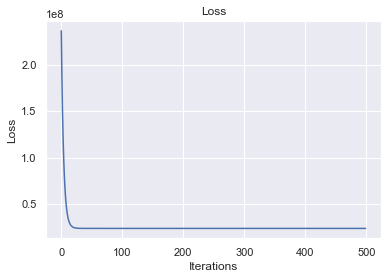

In [8]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
sns.lineplot(range(len(loss_log)), loss_log)

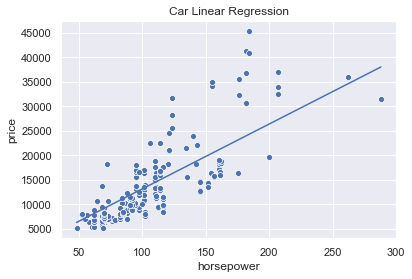

In [9]:
plt.title('Car Linear Regression')
x_line = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 1000)
sns.scatterplot(x='horsepower', y='price', data=data)
sns.lineplot(x=x_line, y=w*x_line+b, data=data)